# Analysis AirBnB Listings

### Analysing Seattle and Boston AirBnB to answer questions using the CRISP-DM Process

Dataset is available on Kaggle for [Seattle](https://www.kaggle.com/datasets/airbnb/seattle?select=reviews.csv) and [Boston](https://www.kaggle.com/datasets/airbnb/boston?select=reviews.csv)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## CRISP-DM Process

- Business Understanding: From the dataset, we can get a better understanding of AirBnB rentals in Boston and Seattle. I'll need to answer some questions such as:

    - What is the distribution of prices in Boston and Seattle respectively?
    - When is the busiest season in Boston and Seattle respectively?
    - Do busy seasons affect price in Boston and Seattle respectively?
    - What areas are most common in Boston and Seattle respectively?
    - Where are the best reviewed AirBnBs located?
    
- Data Understanding: Understand the dataset, it's shape, data types, description etc.
- Data Preparation: Clean and prepare data for analysis
- Data Modeling: Model data with linear regrission to predict prices based on features
- Results Evaluation: Evaluate results and draw conclusion

### Data Understanding

We begin by loading the datasets and then viweing the first five columns to get an understanding of the data

In [2]:
seattle_listings = pd.read_csv("/Users/ifunanya/Downloads/seattle_listings.csv")
seattle_reviews = pd.read_csv("/Users/ifunanya/Downloads/seattle_reviews.csv")
seattle_calendar = pd.read_csv("/Users/ifunanya/Downloads/seattle_calendar.csv")
boston_listings = pd.read_csv("/Users/ifunanya/Downloads/boston_listings.csv")
boston_reviews = pd.read_csv("/Users/ifunanya/Downloads/boston_reviews.csv")
boston_calendar = pd.read_csv("/Users/ifunanya/Downloads/boston_calendar.csv")

In [3]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


From the dataset, we'll focus more on the listings datasets for both Boston and Seattle. We'll then look at the columns and their shapes.

In [9]:
print(seattle_listings.columns)
print(seattle_listings.shape)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [10]:
print(boston_listings.columns)
print(boston_listings.shape)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [11]:
boston_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [12]:
seattle_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Some columns have missing values. This will be handled for the columns relevant to the analysis. Other columns not relevant will be left as is.

### Data Preparation

Boston dataset has three more columns that the Seattle dataset. I'll proceed to identify the common columns and drop the other three to ensure that the datasets can be merged seamlesssly.

In [13]:
# Identify common columns between the two datasets
common_columns = boston_listings.columns.intersection(seattle_listings.columns)

# Filter the datasets to only keep the common columns
boston_listings = boston_listings[common_columns]
seattle_listings = seattle_listings[common_columns]

# Check the shape of the datasets after filtering
boston_listings.shape, seattle_listings.shape

((3585, 92), (3818, 92))

Now both datasets have the same columns. I'll proceed to add a city column to enable identification of the rows afterwhich I'll proceed to merge the datasets.

In [14]:
# Add a 'city' column to each dataset
boston_listings['city'] = 'Boston'
seattle_listings['city'] = 'Seattle'

# Merge the two datasets by rows
merged_listings = pd.concat([boston_listings, seattle_listings], axis=0, ignore_index=True)

# Display the shape and first few rows of the merged dataset
merged_listings.shape, merged_listings.head()

((7403, 92),
          id                            listing_url       scrape_id  \
 0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
 1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
 2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
 3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
 4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   
 
   last_scraped                                           name  \
 0   2016-09-07                     Sunny Bungalow in the City   
 1   2016-09-07              Charming room in pet friendly apt   
 2   2016-09-07               Mexican Folk Art Haven in Boston   
 3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
 4   2016-09-07                            Come Home to Boston   
 
                                              summary  \
 0  Cozy, sunny, family home.  Master bedroom high...   
 1  Charming and quiet room in a second floor 1

After merging, I'll handle missing values and data type conversions for the price column.

In [15]:
# Convert the 'price' column from string to numeric after removing the dollar sign and commas
merged_listings['price'] = merged_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/1l/vb42vw715ndd_r3d14zshrjr0000gn/T/ipykernel_14274/3681980513.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_listings['price'] = merged_listings['price'].str.replace(',', '').str.replace('$', '').astype(float)


In [16]:
#Next, I'll handle missing values in the dataset.

merged_listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
                                    ... 
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
calculated_host_listings_count         0
reviews_per_month                   1383
Length: 92, dtype: int64

 Given the large number of features, I'll be prioritizing columns that are likely to have an impact on the price.

Some of these columns might include:

- Property type (property_type)
- Room type (room_type)
- Accommodates (accommodates)
- Bathrooms (bathrooms)
- Bedrooms (bedrooms)
- Beds (beds)
- Review scores rating (review_scores_rating)

In [17]:
# Select columns of interest
columns_of_interest = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'price']

# Check missing values for the selected columns
missing_values = merged_listings[columns_of_interest].isnull().sum()

missing_values

property_type              4
room_type                  0
accommodates               0
bathrooms                 30
bedrooms                  16
beds                      10
review_scores_rating    1460
price                      0
dtype: int64

To handle these missing values:

For property_type, I'll fill missing values with the mode (most common value). This is because there are just four property type values missing.
For numeric columns like bathrooms, bedrooms, beds, and review_scores_rating, I'll fill missing values with the median value of each respective column. This is to prevent outliers skewing the data.

In [18]:
# Inpute missing values

# Fill missing values in 'property_type' with mode
merged_listings['property_type'].fillna(merged_listings['property_type'].mode()[0], inplace=True)

# Fill missing values in numeric columns with median
for column in ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating']:
    merged_listings[column].fillna(merged_listings[column].median(), inplace=True)

# Check if missing values are addressed
missing_values_after = merged_listings[columns_of_interest].isnull().sum()

missing_values_after

property_type           0
room_type               0
accommodates            0
bathrooms               0
bedrooms                0
beds                    0
review_scores_rating    0
price                   0
dtype: int64

### Data Exploration

### What is the distribution of prices in Boston and Seattle respectively?

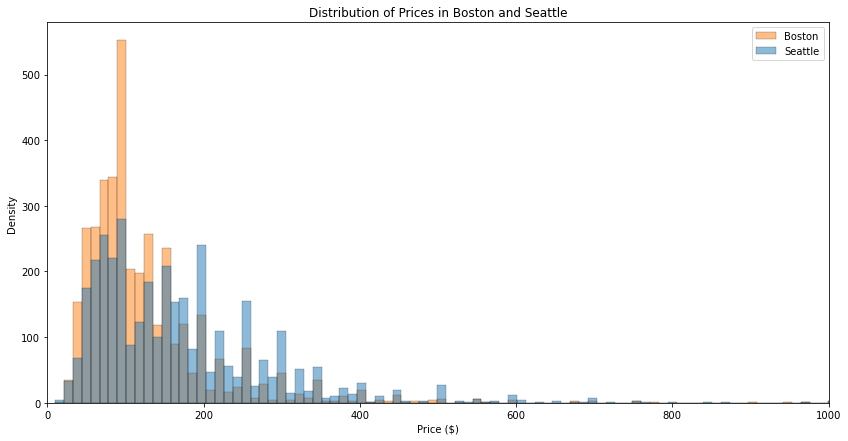

In [19]:
# Plot the distribution of prices for Boston and Seattle
plt.figure(figsize=(14, 7))
sns.histplot(merged_listings, x="price", hue="city", common_norm=False)
plt.title("Distribution of Prices in Boston and Seattle")
plt.xlabel("Price ($)")
plt.ylabel("Density")
plt.xlim(0, 1000)  # Limiting x-axis to 1000 for better visualization
plt.legend(['Boston', 'Seattle']);
plt.show()

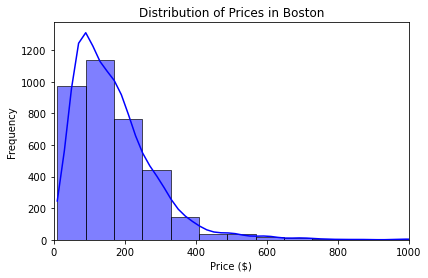

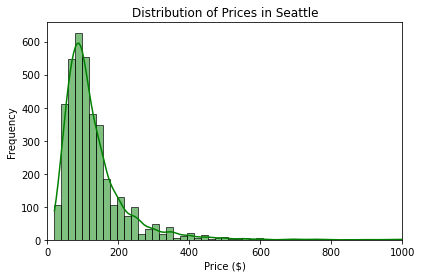

In [20]:
# Boston
boston = merged_listings[merged_listings['city'] == 'Boston']
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.histplot(boston['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices in Boston')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting x-axis to view the majority of listings

# Seattle
seattle = merged_listings[merged_listings['city'] == 'Seattle']
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 2)
sns.histplot(seattle['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Prices in Seattle')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1000)  # Limiting x-axis to view the majority of listings

plt.show()

The price distribution for Boston and Seattle listings are as follows:
- Boston: The majority of listings are priced between 50 and 200, with a peak around 150.
- Seattle: The price distribution is similar to Boston, with most listings priced between 50 and 200. However, Seattle has a slightly more pronounced peak around the 100 mark


### When is the busiest season in Boston and Seattle respectively?

In [21]:
boston_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

In [22]:
seattle_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

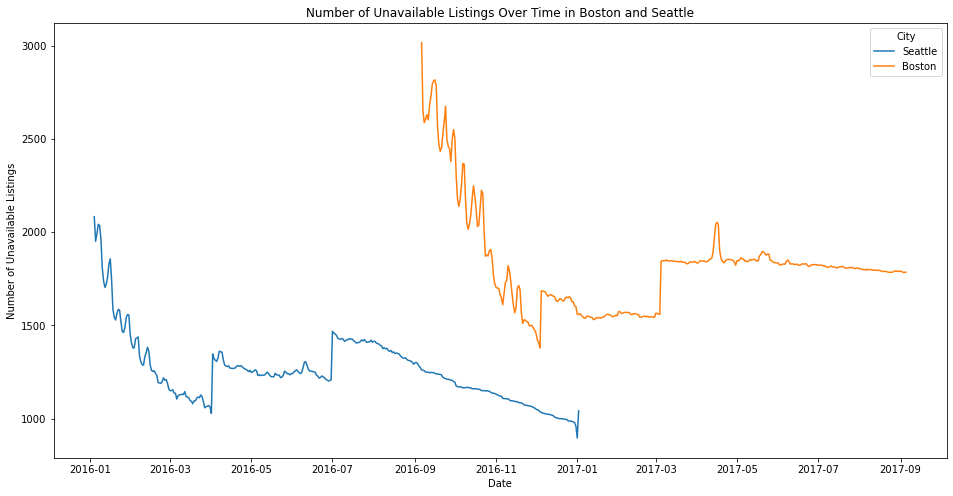

In [23]:
boston_calendar['city'] = 'Boston'
seattle_calendar['city'] = 'Seattle'

# Merge the two calendar datasets by rows
merged_calendar = pd.concat([boston_calendar, seattle_calendar], axis=0, ignore_index=True)

# Convert the 'date' column to datetime format for analysis
merged_calendar['date'] = pd.to_datetime(merged_calendar['date'])

# Filter for unavailable listings
unavailable_calendar = merged_calendar[merged_calendar['available'] == 'f']

# Count the number of unavailable listings by date and city
unavailable_counts = unavailable_calendar.groupby(['date', 'city']).size().reset_index(name='count')

# Plot the number of unavailable listings over time for both cities
plt.figure(figsize=(16, 8))
sns.lineplot(data=unavailable_counts, x='date', y='count', hue='city')
plt.title('Number of Unavailable Listings Over Time in Boston and Seattle')
plt.xlabel('Date')
plt.ylabel('Number of Unavailable Listings')
plt.legend(title='City')
plt.show()

- Boston: There is a clear peak of unavailability around September 2016, which might indicate the busiest season in Boston. Another noticeable peak occurs around April 2017.
- Seattle: The busiest seasons seem to be around January and July.


### Do busy seasons affect price in Boston and Seattle respectively?

/var/folders/1l/vb42vw715ndd_r3d14zshrjr0000gn/T/ipykernel_14274/1107189391.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_calendar['price'] = merged_calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)


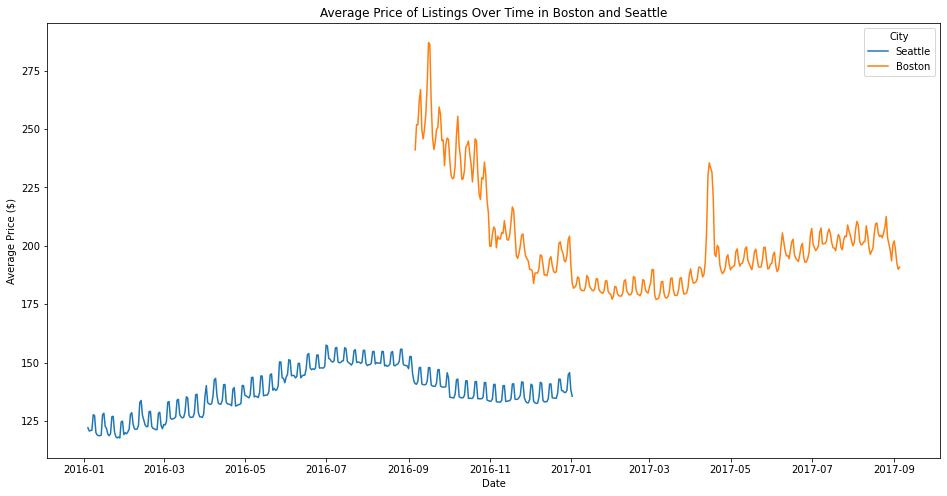

In [24]:
# Convert the 'price' column in merged_calendar to numeric format
merged_calendar['price'] = merged_calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)

# Calculate the average price by date and city
average_prices = merged_calendar.groupby(['date', 'city'])['price'].mean().reset_index()

# Plot the average prices over time for both cities
plt.figure(figsize=(16, 8))
sns.lineplot(data=average_prices, x='date', y='price', hue='city')
plt.title('Average Price of Listings Over Time in Boston and Seattle')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.legend(title='City')
plt.show()

- Boston: The average price spikes around September, which correlates with the busiest season observed in the previous graph. There's also a noticeable increase in prices around April.
- Seattle: The prices seem to rise starting from May and peak around July before starting to decrease, aligning with the some of the busy period observed for Seattle.

This suggests that busy seasons do have an impact on the average listing prices in both Boston and Seattle.

### What areas are most common in Boston and Seattle respectively?

In [25]:
def get_top_neighbourhoods(df, col, city_name, count_col, num_top):
    """
    Get the top neighborhoods in a given city based on the number of listings.
    
    Parameters:
    - df (DataFrame): The data frame containing the neighborhood and listing count information.
    - col (str): column name
    - city_name (str): The name of the city to filter by
    - count_col (str): The column name representing the count of listings
    - num_top (int): The number of top neighborhoods to return
    
    Returns:
    DataFrame: A data frame containing the top neighborhoods in the specified city based on listing counts.
    """
    top_neighbourhoods = df[df[col] == city_name].sort_values(by=count_col, ascending=False, ignore_index=True).head(num_top)
    return top_neighbourhoods

In [26]:
# Count the number of listings in each neighbourhood for both cities
neighbourhood_counts = merged_listings.groupby(['city', 'neighbourhood_cleansed']).size().reset_index(name='count')

# Sort the counts in descending order for each city to get the most common areas
top_neighbourhoods_boston = get_top_neighbourhoods(neighbourhood_counts, 'city', 'Boston', 'count', 10)
top_neighbourhoods_seattle = get_top_neighbourhoods(neighbourhood_counts, 'city', 'Seattle', 'count', 10)

top_neighbourhoods_boston, top_neighbourhoods_seattle

(     city neighbourhood_cleansed  count
 0  Boston          Jamaica Plain    343
 1  Boston              South End    326
 2  Boston               Back Bay    302
 3  Boston                 Fenway    290
 4  Boston             Dorchester    269
 5  Boston                Allston    260
 6  Boston            Beacon Hill    194
 7  Boston               Brighton    185
 8  Boston           South Boston    174
 9  Boston               Downtown    172,
       city     neighbourhood_cleansed  count
 0  Seattle                   Broadway    397
 1  Seattle                   Belltown    234
 2  Seattle                Wallingford    167
 3  Seattle                    Fremont    158
 4  Seattle                      Minor    135
 5  Seattle        University District    122
 6  Seattle                    Stevens    119
 7  Seattle                 First Hill    108
 8  Seattle  Central Business District    103
 9  Seattle           Lower Queen Anne     94)

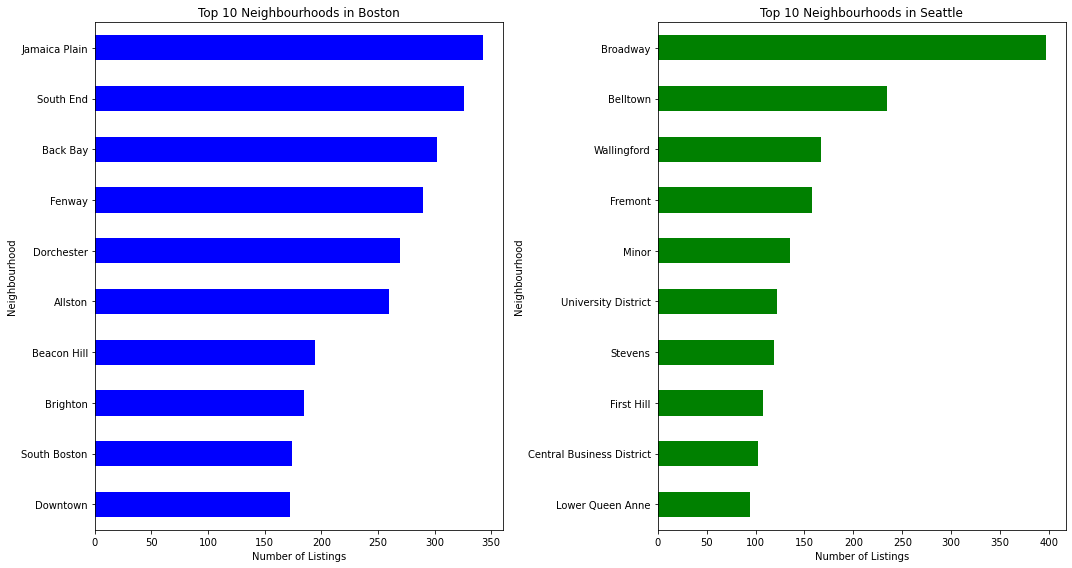

In [27]:
# Plotting the top 10 neighborhoods for Boston and Seattle
plt.figure(figsize=(15, 8))

# Boston
plt.subplot(1, 2, 1)
boston['neighbourhood_cleansed'].value_counts().head(10).plot(kind='barh', color='blue')
plt.title('Top 10 Neighbourhoods in Boston')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.gca().invert_yaxis()  # Invert y-axis to display the neighborhood with the most listings at the top

# Seattle
plt.subplot(1, 2, 2)
seattle['neighbourhood_cleansed'].value_counts().head(10).plot(kind='barh', color='green')
plt.title('Top 10 Neighbourhoods in Seattle')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.gca().invert_yaxis()  # Invert y-axis to display the neighborhood with the most listings at the top

plt.tight_layout()
plt.show()

### Where are the best-reviewed AirBnBs located?

In [28]:
# Calculate the average review scores by neighbourhood for both cities
average_review_scores = merged_listings.groupby(['city', 'neighbourhood_cleansed'])['review_scores_rating'].mean().reset_index()

# Sort the scores in descending order for each city to get the neighborhoods with the highest average review scores
top_reviewed_neighbourhoods_boston = get_top_neighbourhoods(average_review_scores, 'city', 'Boston', 'review_scores_rating', 10)
top_reviewed_neighbourhoods_seattle = get_top_neighbourhoods(average_review_scores, 'city', 'Seattle', 'review_scores_rating', 10)

top_reviewed_neighbourhoods_boston, top_reviewed_neighbourhoods_seattle

(     city   neighbourhood_cleansed  review_scores_rating
 0  Boston         Leather District             97.400000
 1  Boston               Roslindale             95.446429
 2  Boston             West Roxbury             95.434783
 3  Boston    Longwood Medical Area             95.333333
 4  Boston  South Boston Waterfront             94.903614
 5  Boston              Charlestown             94.423423
 6  Boston            Jamaica Plain             94.416910
 7  Boston             South Boston             94.224138
 8  Boston                North End             94.090909
 9  Boston              Bay Village             94.000000,
       city  neighbourhood_cleansed  review_scores_rating
 0  Seattle               Riverview             97.250000
 1  Seattle           Arbor Heights             97.200000
 2  Seattle      Southeast Magnolia             97.000000
 3  Seattle                 Madrona             96.936170
 4  Seattle   Harrison/Denny-Blaine             96.928571
 5  Seattle  

### Data Modeling

Another question to answer:

#### "What impacts the price of an AirBnB listing?"

I'll begin by:

- Visualizing the relationships between the selected features and the price.
- Computing correlation coefficients to quantitatively determine the relationships

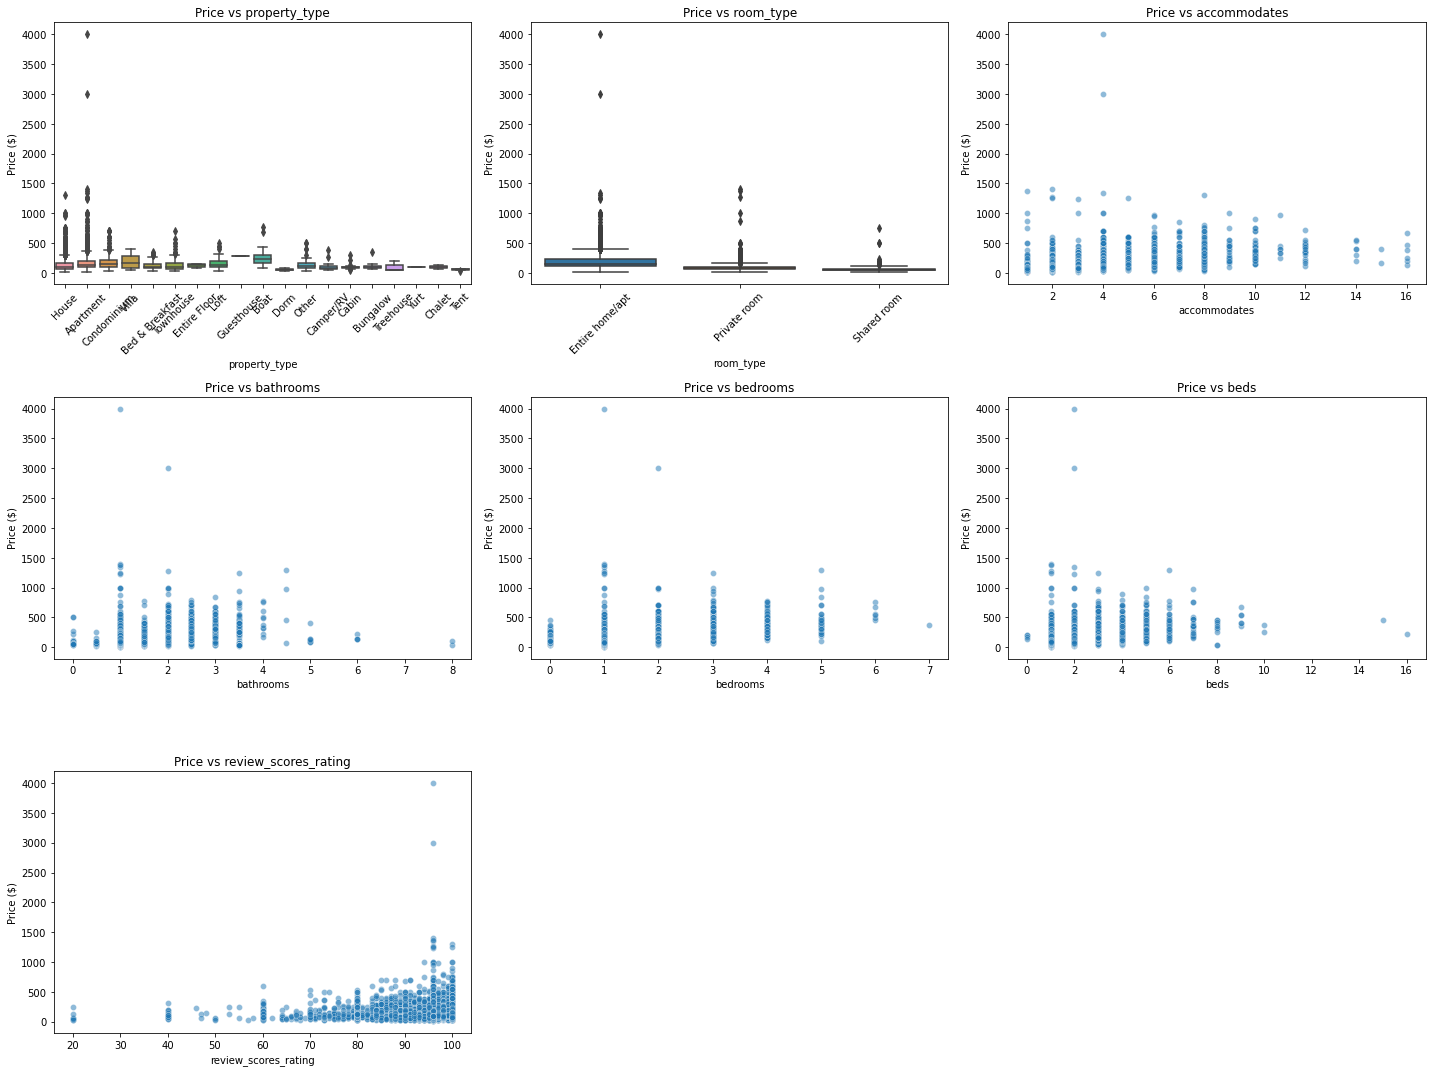

In [29]:
# Set up the figure size
plt.figure(figsize=(20, 15))

# Plotting the relationships
features = ['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    if merged_listings[column].dtype == 'object':
        sns.boxplot(x=column, y='price', data=merged_listings)
        plt.xticks(rotation=45)
    else:
        sns.scatterplot(x=column, y='price', data=merged_listings, alpha=0.5)
    plt.ylabel('Price ($)')
    plt.title(f'Price vs {column}')

# Adjust layout
plt.tight_layout()
plt.show()

From the visualizations, we can make the following observations:

- Property Type vs Price: There is variation in the median prices across different property types. For instance, the price for an entire home/apartment is generally higher than for a private room.

- Room Type vs Price: Entire homes/apartments tend to have higher prices compared to private or shared rooms.

- Accommodates vs Price: There's a positive trend between the number of people a property can accommodate and its price.

- Bathrooms vs Price: Listings with more bathrooms tend to have higher prices.

- Bedrooms vs Price: There's a clear positive relationship between the number of bedrooms and price.

- Beds vs Price: Listings with more beds generally have higher prices.

- Review Scores Rating vs Price: There doesn't seem to be a very strong correlation between review scores and price. However, listings with very low review scores tend to have lower prices

In [30]:
# Computing correlation coefficients between the selected features and the price
correlations = merged_listings[columns_of_interest].corr()['price'].sort_values(ascending=False)

correlations

price                   1.000000
accommodates            0.479576
bedrooms                0.450777
beds                    0.422814
bathrooms               0.333111
review_scores_rating    0.050164
Name: price, dtype: float64

Based on the correlation coefficients:

- accommodates: A moderate positive correlation of 0.48 indicates that as the number of people a property can accommodate increases, the price tends to increase.
- bedrooms: A moderate positive correlation of 0.45 suggests that listings with more bedrooms generally have higher prices.
- beds: A moderate positive correlation of 0.42 suggests that listings with more beds generally have higher prices.
- bathrooms: A positive correlation of 0.33 indicates that listings with more bathrooms tend to have higher prices.
- review_scores_rating: A very weak positive correlation of 0.05 suggests that there isn't a strong relationship between review scores and price.

I'll proceed to use supervised learning to predict prices using the selected features.

To do this, I will:

- Convert categorical variables into numerical format using one-hot encoding.
- Split the data into training and test sets.
- Train a regression model.
- Predict prices and evaluate the model's performance.
- Show some sample predictions.

In [31]:
# Convert categorical variables into numerical format using one-hot encoding
data_encoded = pd.get_dummies(merged_listings[columns_of_interest], drop_first=True)

# Split the data into training and test sets
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict prices
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(6173.424759191048, 0.4658415319472802)

### Results Evaluation and Conclusion

In [32]:
# Create a dataframe for some sample predictions
samples = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True).sample(10)

samples

,Actual,Predicted
20,50.0,96.069299
150,68.0,87.782535
63,99.0,110.936033
332,120.0,97.925590
417,85.0,51.119199
1293,135.0,167.895002
585,90.0,101.701718
479,62.0,60.381753
736,100.0,100.232305
952,229.0,173.631992


The model achieved an R-squared (R²) value of 0.47, meaning it can explain approximately 47% of the variability in the listing prices. The Mean Squared Error (MSE) was 6173.42. While the R² isn't exceptionally high, it's a decent starting point, especially considering the myriad of factors that can influence AirBnB prices.

#### Insights & Recommendations
1.	Correlations: The number of people a property can accommodate, bedrooms, and beds showed moderate positive correlations with the price. This means listings with more beds, bedrooms, or larger accommodation capacities generally have higher prices.
2.	Busy Seasons & Price: We observed from the data that busy seasons (times with higher bookings) tend to have higher prices. This is a classic demand-supply interplay.
3.	Improvements: The model can be further improved by considering more features, trying more complex algorithms, or incorporating external data.
